# **Enhancing Customer Relationships through CRM Analysis**:



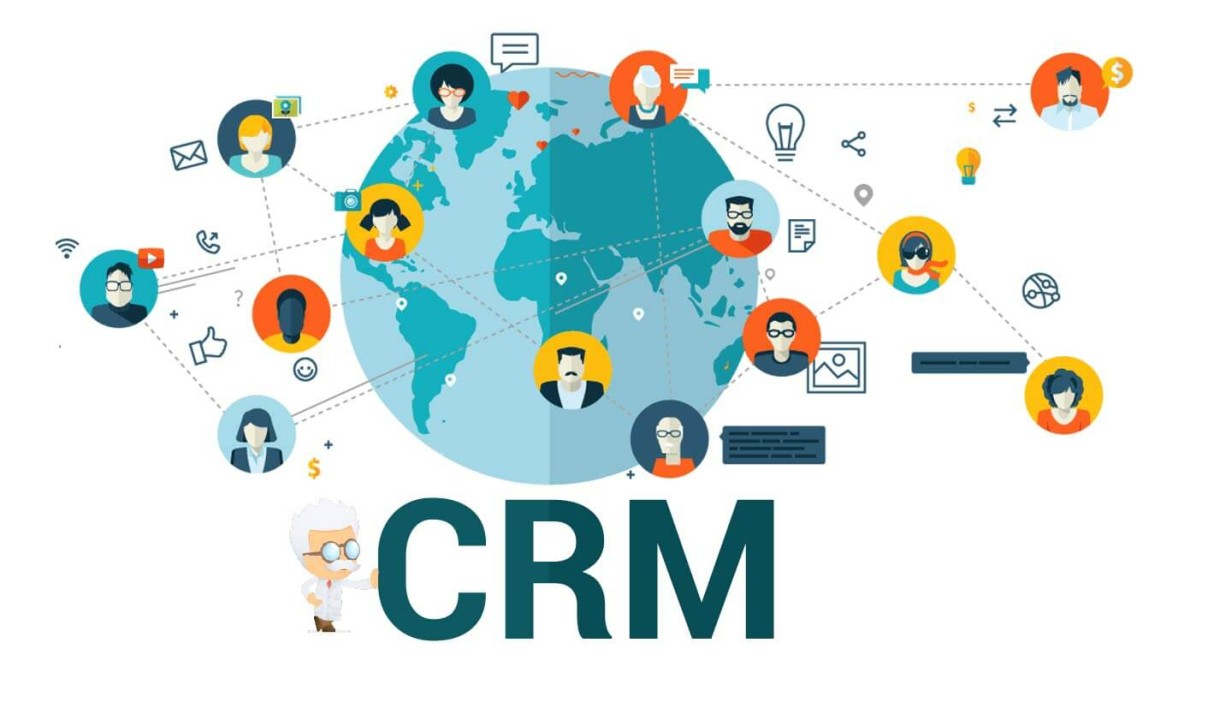

# **CRM analysis**

**Customer Relationship Management (CRM)** analysis is the systematic assessment of data, capturing interactions between a business and its customers. It helps extract insights to enhance customer relationships and optimize business strategies. By examining customer data, CRM analysis aims to improve overall customer satisfaction and engagement.

**Dataset Description:**

The dataset encompasses transactions from 01/12/2010 to 09/12/2011 for a non-store online retail business based and registered in the UK. Specializing in distinctive all-occasion gifts, the company's clientele includes a significant number of wholesale customers.


**Variable Description**

InvoiceNo: Invoice number that consists 6 digits. If this code starts with letter 'c', it indicates a cancellation.

StockCode: Product code that consists 5 digits.

Description: Product name.

Quantity: The quantities of each product per transaction.

InvoiceDate: This represents the day and time when each transaction was generated.

UnitPrice: Product price per unit.

CustomerID: Customer number that consists 5 digits. Each customer has a unique
customer ID.

Country: Name of the country where each customer resides.

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [ ]:
# Load the dataset
data = pd.read_csv("Ecom_CRM_analysis.csv", encoding='latin-1')

# **EDA and Data Overview**

In [ ]:
# Data Overview
print("Data Overview:")
print(data.head())

Data Overview:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  


In [ ]:
# Identify key variables
key_variables = ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']


In [ ]:
data.shape

(541909, 8)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
# Checking for duplicate records
data.duplicated().value_counts()

False    536641
True       5268
dtype: int64

In [ ]:
# Handle duplicate records : drop the duplicate records
data= data.drop_duplicates().reset_index(drop = True)

In [ ]:
data.shape

(536641, 8)

In [ ]:
# Checking for Null values
data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [ ]:
# Finding Percentage of null values
(data.isna().sum() / data.shape[0] ) * 100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.270945
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     25.163377
Country         0.000000
dtype: float64

In [ ]:
# Replacing Null values in CustomerId with 0
data['CustomerID'] = data['CustomerID'].fillna(0)

# Replacing Null values in  Description with 'NA'
data['Description'] = data['Description'].fillna('NA')

**Observation**:

There are around 5268 duplicate records . Have droped the duplicate records from data.

**Column** : Description and CustomerID are having Null values

Percentage of null values in CustomerID is **25.16 % **(approx).Replaced all Null values with 0

Percentage of null values in Description is **0.27 % **(approx).Replaced all Null values with 'NA'

In [ ]:
data.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
# Finding unique values with count in Column Country ( To know customer distribution over countries)
data['Country'].value_counts()

United Kingdom          490300
Germany                   9480
France                    8541
EIRE                      8184
Spain                     2528
Netherlands               2371
Belgium                   2069
Switzerland               1994
Portugal                  1510
Australia                 1258
Norway                    1086
Italy                      803
Channel Islands            757
Finland                    695
Cyprus                     611
Sweden                     461
Unspecified                442
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     294
USA                        291
Hong Kong                  284
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [ ]:
# Percentage of Orders based on country

percentage_orders_per_country = (data.groupby('Country')['InvoiceNo'].nunique() / data['InvoiceNo'].nunique()) * 100
print("Percentage of Orders based on Country:")
print(percentage_orders_per_country)



Percentage of Orders based on Country:
Country
Australia                0.266409
Austria                  0.073359
Bahrain                  0.015444
Belgium                  0.459459
Brazil                   0.003861
Canada                   0.023166
Channel Islands          0.127413
Cyprus                   0.077220
Czech Republic           0.019305
Denmark                  0.081081
EIRE                     1.389961
European Community       0.019305
Finland                  0.185328
France                   1.779923
Germany                  2.328185
Greece                   0.023166
Hong Kong                0.057915
Iceland                  0.027027
Israel                   0.034749
Italy                    0.212355
Japan                    0.108108
Lebanon                  0.003861
Lithuania                0.015444
Malta                    0.038610
Netherlands              0.389961
Norway                   0.154440
Poland                   0.092664
Portugal                 0.274131
R

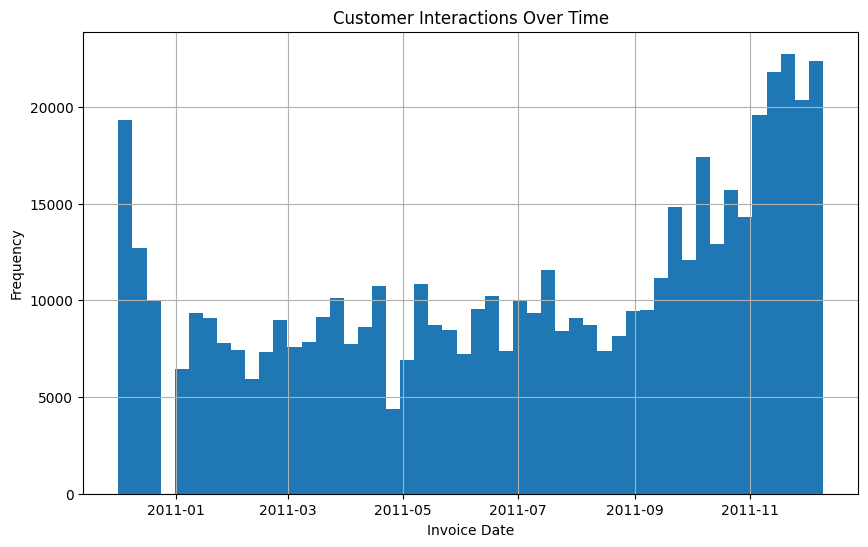

In [ ]:
# Visualize customer interactions over time
plt.figure(figsize=(10, 6))
data['InvoiceDate'].hist(bins=50)
plt.title('Customer Interactions Over Time')
plt.xlabel('Invoice Date')
plt.ylabel('Frequency')
plt.show()


Product Purchase Details:


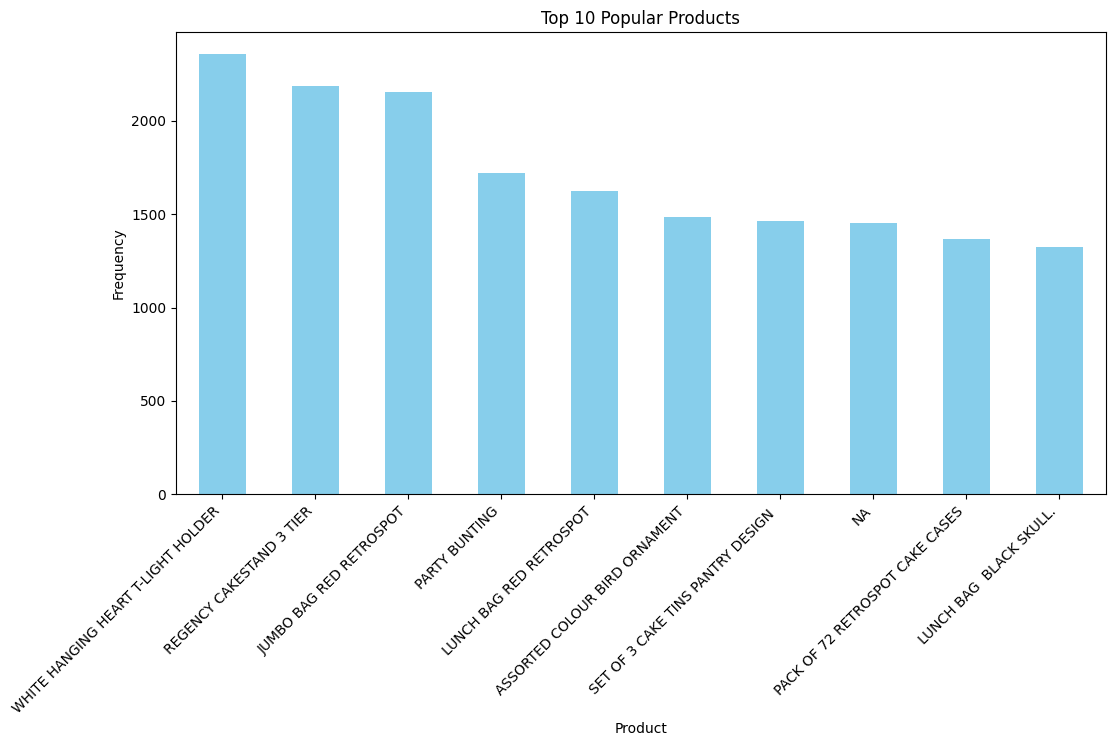

In [ ]:
# Analyze unique product purchase patterns
print("\nProduct Purchase Details:")
# Visualize popular products
top_products = data['Description'].value_counts().head(10)
plt.figure(figsize=(12, 6))
top_products.plot(kind='bar', color='skyblue')
plt.title('Top 10 Popular Products')
plt.xlabel('Product')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

# **Feature Engineering**

In [ ]:
# Converting data type of InvoiceDate to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Converting CustomerId to int
data['CustomerID'] = data['CustomerID'].astype(int)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536641 entries, 0 to 536640
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    536641 non-null  object        
 1   StockCode    536641 non-null  object        
 2   Description  536641 non-null  object        
 3   Quantity     536641 non-null  int64         
 4   InvoiceDate  536641 non-null  datetime64[ns]
 5   UnitPrice    536641 non-null  float64       
 6   CustomerID   536641 non-null  int64         
 7   Country      536641 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 32.8+ MB


- Invoice number that consists 6 digits. If this code starts with letter 'c', it indicates a cancellation.Creating a new column to identify if it is cancellation (Cancellation) or adjustoment of bad debt (AdjustBadDebt) or a normal invoice (Normal).

- Bad debt refers to loans or outstanding balances owed that are no longer deemed recoverable and must be written off.

In [ ]:
data.loc[data['InvoiceNo'].str.lower().str.contains('c'),'InvoiceType'] = 'Cancellation'
data.loc[data['InvoiceNo'].str.lower().str.contains('a'),'InvoiceType'] = 'AdjustBadDebt'
data.loc[(~data['InvoiceNo'].str.lower().str.contains('c')) & (~data['InvoiceNo'].str.lower().str.contains('a')),
          'InvoiceType'] = 'Normal'

In [ ]:
data['InvoiceType'].value_counts()

Normal           527387
Cancellation       9251
AdjustBadDebt         3
Name: InvoiceType, dtype: int64

In [ ]:
data.loc[(data['Quantity'] >= 0 ) &( data['InvoiceType'] == 'Cancellation'),:]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceType


- Note : For all cancellation the quantity is negative so it is a return transaction

**Total Sales**

In [ ]:
# Crating a new column to hold total invoice amount or total order amount ( = Qty * UnitPrice)
data['TotalAmount'] = data['UnitPrice'] * data['Quantity']

In [ ]:
#Total Sales
data['TotalAmount'].sum()

9726006.953999998

**Total Orders**

In [ ]:
#Total Orders
data['InvoiceNo'].nunique()

25900

# Feature Eng. Continued

In [ ]:
# Extract Year and Month values from InvoiceDate to do more granular analysis
data['InvoiceYear'] = data['InvoiceDate'].dt.year
data['InvoiceMonth'] = data['InvoiceDate'].dt.month

In [ ]:
# Creating a column to check if Transaction is Return or Purchase transaction :
# If Qty < 0 then return transaction else purchase

data.loc[data['Quantity'] < 0 ,'TransactionType'] = 'ReturnTransaction'
data.loc[data['Quantity'] >= 0 ,'TransactionType'] = 'PurchaseTransaction'

In [ ]:
data['TransactionType'].value_counts()

PurchaseTransaction    526054
ReturnTransaction       10587
Name: TransactionType, dtype: int64

In [ ]:
(data['TransactionType'].value_counts() / data.shape[0]) * 100

PurchaseTransaction    98.027173
ReturnTransaction       1.972827
Name: TransactionType, dtype: float64

#### Observation :
- There are 526054 Purchase Transaction records which amount to 98% of data .
- There are 10587 Return Transaction records which amount to 1.97 % of data.
- There are 9251 cancellation invoices . For all cancellation invoice the quantity is negative so it is a return transaction. So above return transaction count includes the cancellation invoices also.
- There are 3 invoices to Adjust Bad Debt.

# **Checking for Outliers**

Checking for Outliers on Quantity , UnitPrice , TotalAmount Column only.

In [ ]:
data_outlier = data.describe()
data_outlier.drop(['CustomerID','InvoiceYear','InvoiceMonth'],axis =1 ,inplace=True)
data_outlier

,Quantity,UnitPrice,TotalAmount
count,536641.000000,536641.000000,536641.000000
mean,9.620029,4.632656,18.123861
std,219.130156,97.233118,380.656263
min,-80995.000000,-11062.060000,-168469.600000
25%,1.000000,1.250000,3.750000
50%,3.000000,2.080000,9.870000
75%,10.000000,4.130000,17.400000
max,80995.000000,38970.000000,168469.600000


**Checking count of outliers using IQR Method**

In [ ]:
# Outlier using IQR (Inter Quartile Range)
data_outlier.loc['IQR',:] = data_outlier.loc['75%',:] - data_outlier.loc['25%',:]
data_outlier.loc['UW',:]  = data_outlier.loc['75%',:] + 1.5 * data_outlier.loc['IQR',:]
data_outlier.loc['LW',:]  = data_outlier.loc['25%',:] - 1.5 * data_outlier.loc['IQR',:]

In [ ]:
data_outlier

,Quantity,UnitPrice,TotalAmount
count,536641.000000,536641.000000,536641.000000
mean,9.620029,4.632656,18.123861
std,219.130156,97.233118,380.656263
min,-80995.000000,-11062.060000,-168469.600000
25%,1.000000,1.250000,3.750000
50%,3.000000,2.080000,9.870000
75%,10.000000,4.130000,17.400000
max,80995.000000,38970.000000,168469.600000
IQR,9.000000,2.880000,13.650000
UW,23.500000,8.450000,37.875000


In [ ]:
# Calculatig count of outlier in each of the columns : Quantity , UnitPrice and TotalAmount
for i in data_outlier.columns :
    count_ = data[ (data[i] > data_outlier.loc['UW',i]) | (data[i] < data_outlier.loc['LW',i]) ].shape[0]
    data_outlier.loc['Outlier_Count',i] = count_

data_outlier

,Quantity,UnitPrice,TotalAmount
count,536641.000000,536641.000000,536641.000000
mean,9.620029,4.632656,18.123861
std,219.130156,97.233118,380.656263
min,-80995.000000,-11062.060000,-168469.600000
25%,1.000000,1.250000,3.750000
50%,3.000000,2.080000,9.870000
75%,10.000000,4.130000,17.400000
max,80995.000000,38970.000000,168469.600000
IQR,9.000000,2.880000,13.650000
UW,23.500000,8.450000,37.875000


####  Outlier check using Box Plot


<ipython-input-38-ace2ae057ed8>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bp2 = sns.boxplot(x=col_name,
<ipython-input-38-ace2ae057ed8>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bp2 = sns.boxplot(x=col_name,
<ipython-input-38-ace2ae057ed8>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bp2 = sns.boxplot(x=col_name,


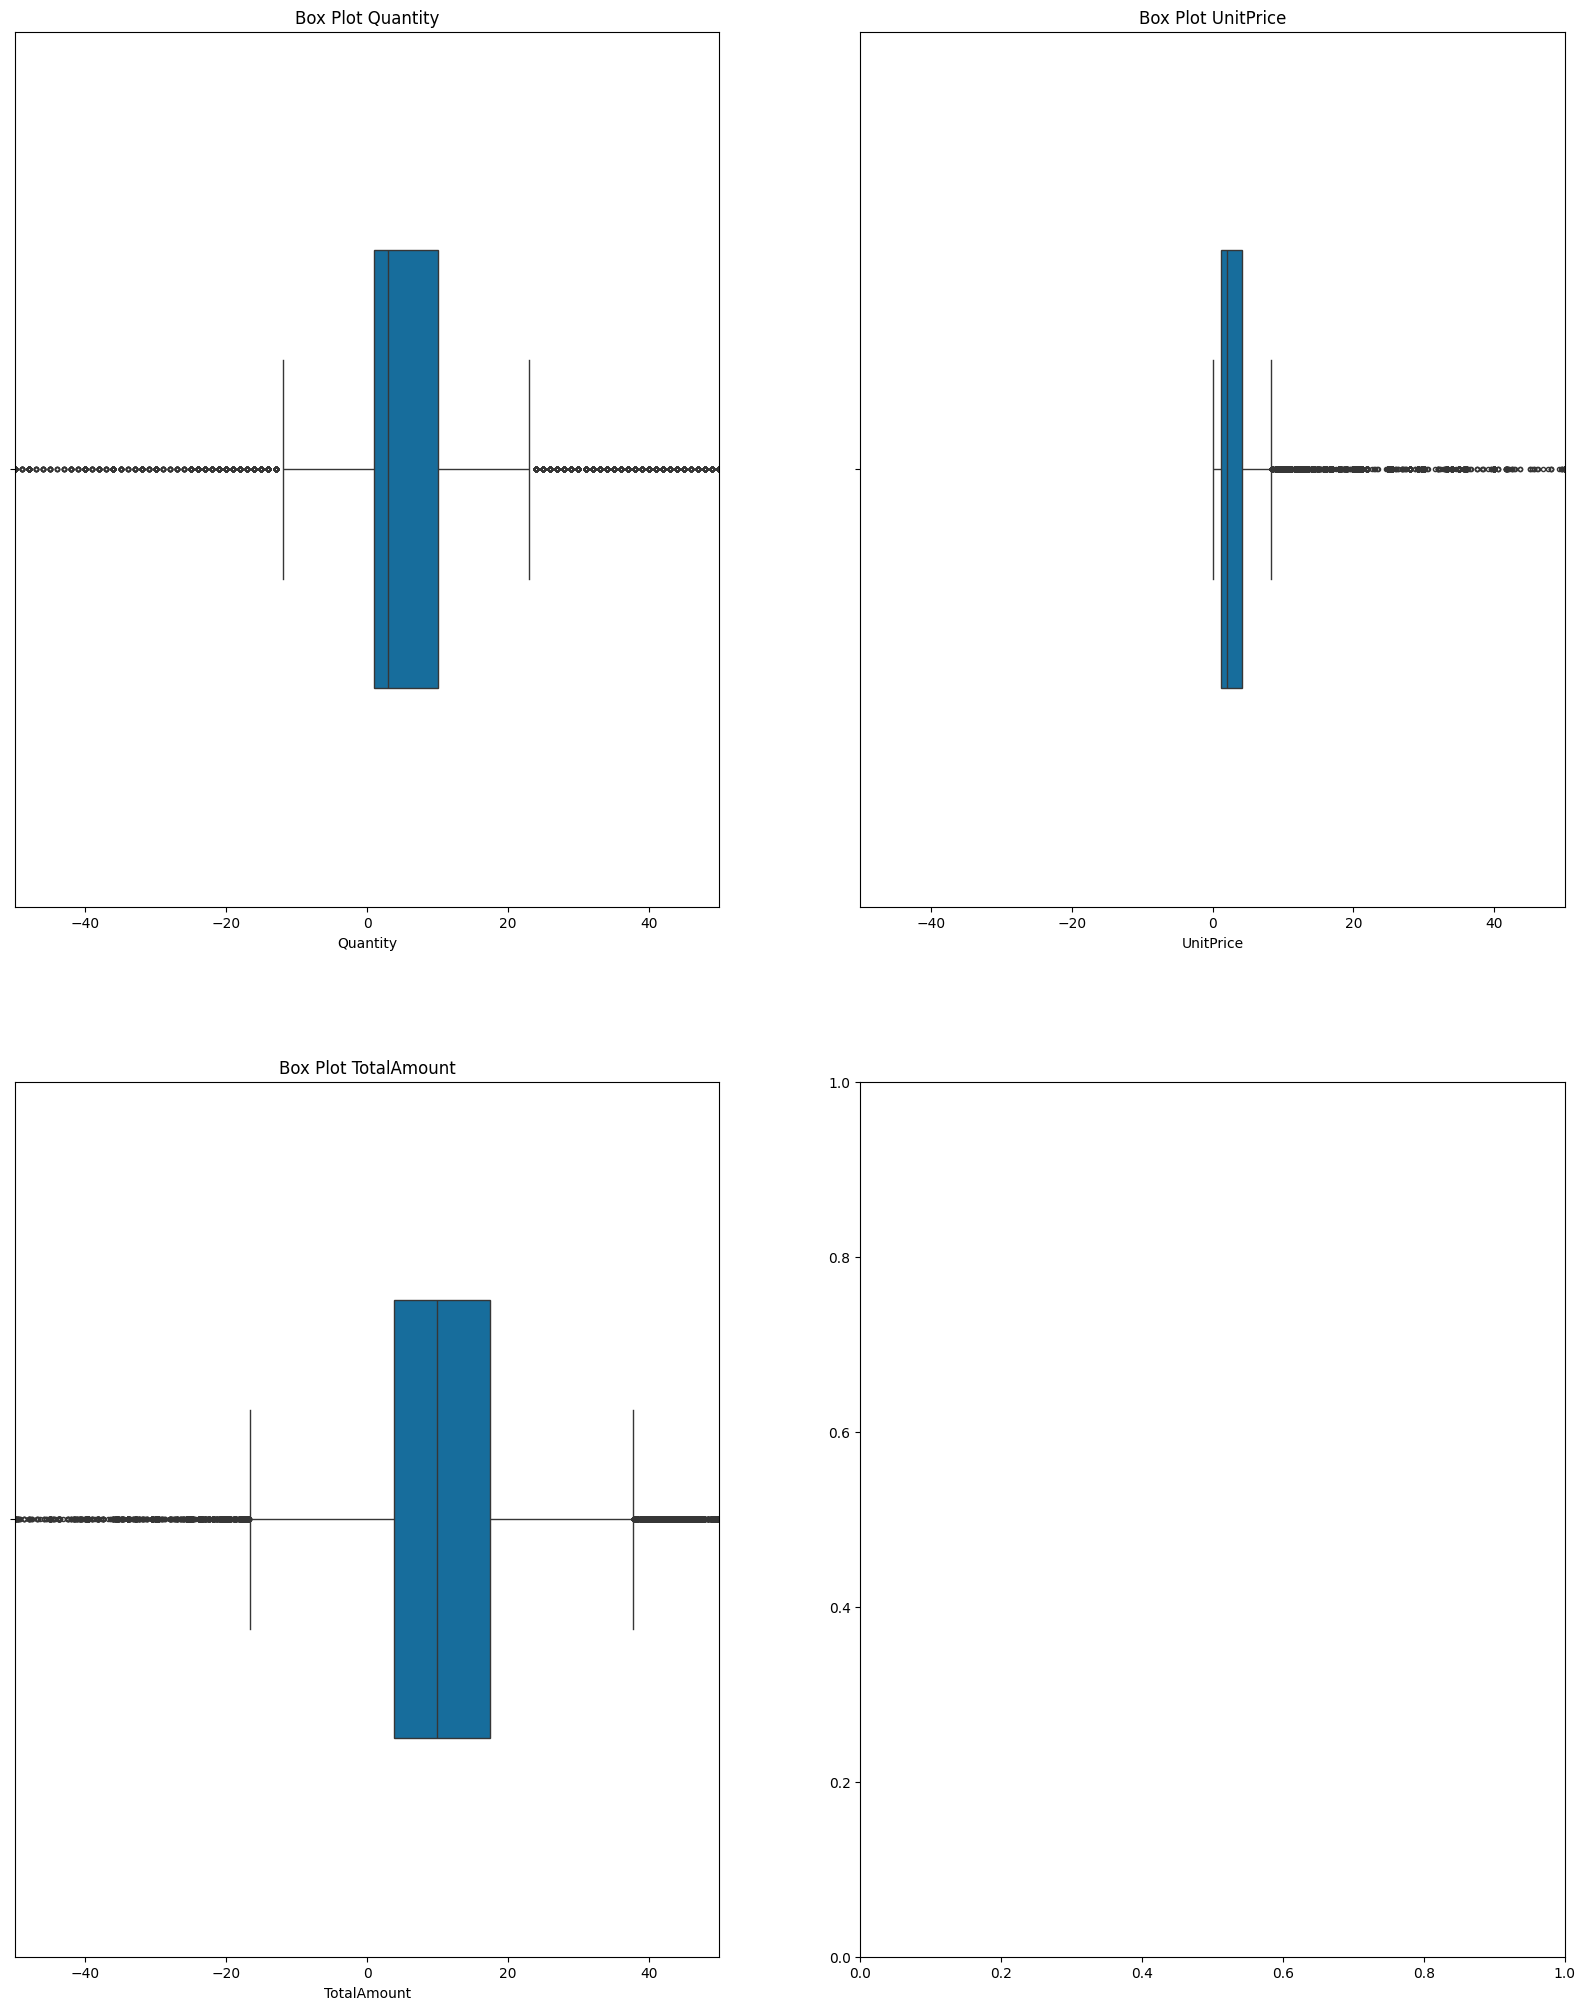

In [ ]:
# Outlier check using Box Plot
cols_ = data_outlier.columns
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(20, 25))
i = 0
j = 0

for col_name in cols_ :
    bp2 = sns.boxplot(x=col_name,
             data=data,
             palette="colorblind",
             width=0.5,
             fliersize=3,
             ax=axis[i,j])
    bp2.set_xlim(-50, 50)

    axis[i,j].set_title('Box Plot '+col_name)
    if j != 1:
        j+=1
    else:
        j = 0
        i+= 1
plt.show()




#### Observation
- There are 58501 number of outler records in Column Quanity
- There are 39450 number of outlier records in column UnitPrice
- There are 45626 number of outlier records in column TotalAmount

- Not removing outlier because the company's clientele includes a significant number of wholesale customers . Due to which the there can be increase in Quantity and TotalAmount as compared to normal customer orders . Also Outlier in UnitPrice (in values greater than upper wisker) signify there are some products which are very expensive (high value goods) being bought by customers.

**Non Graphical and Graphical Analysis**

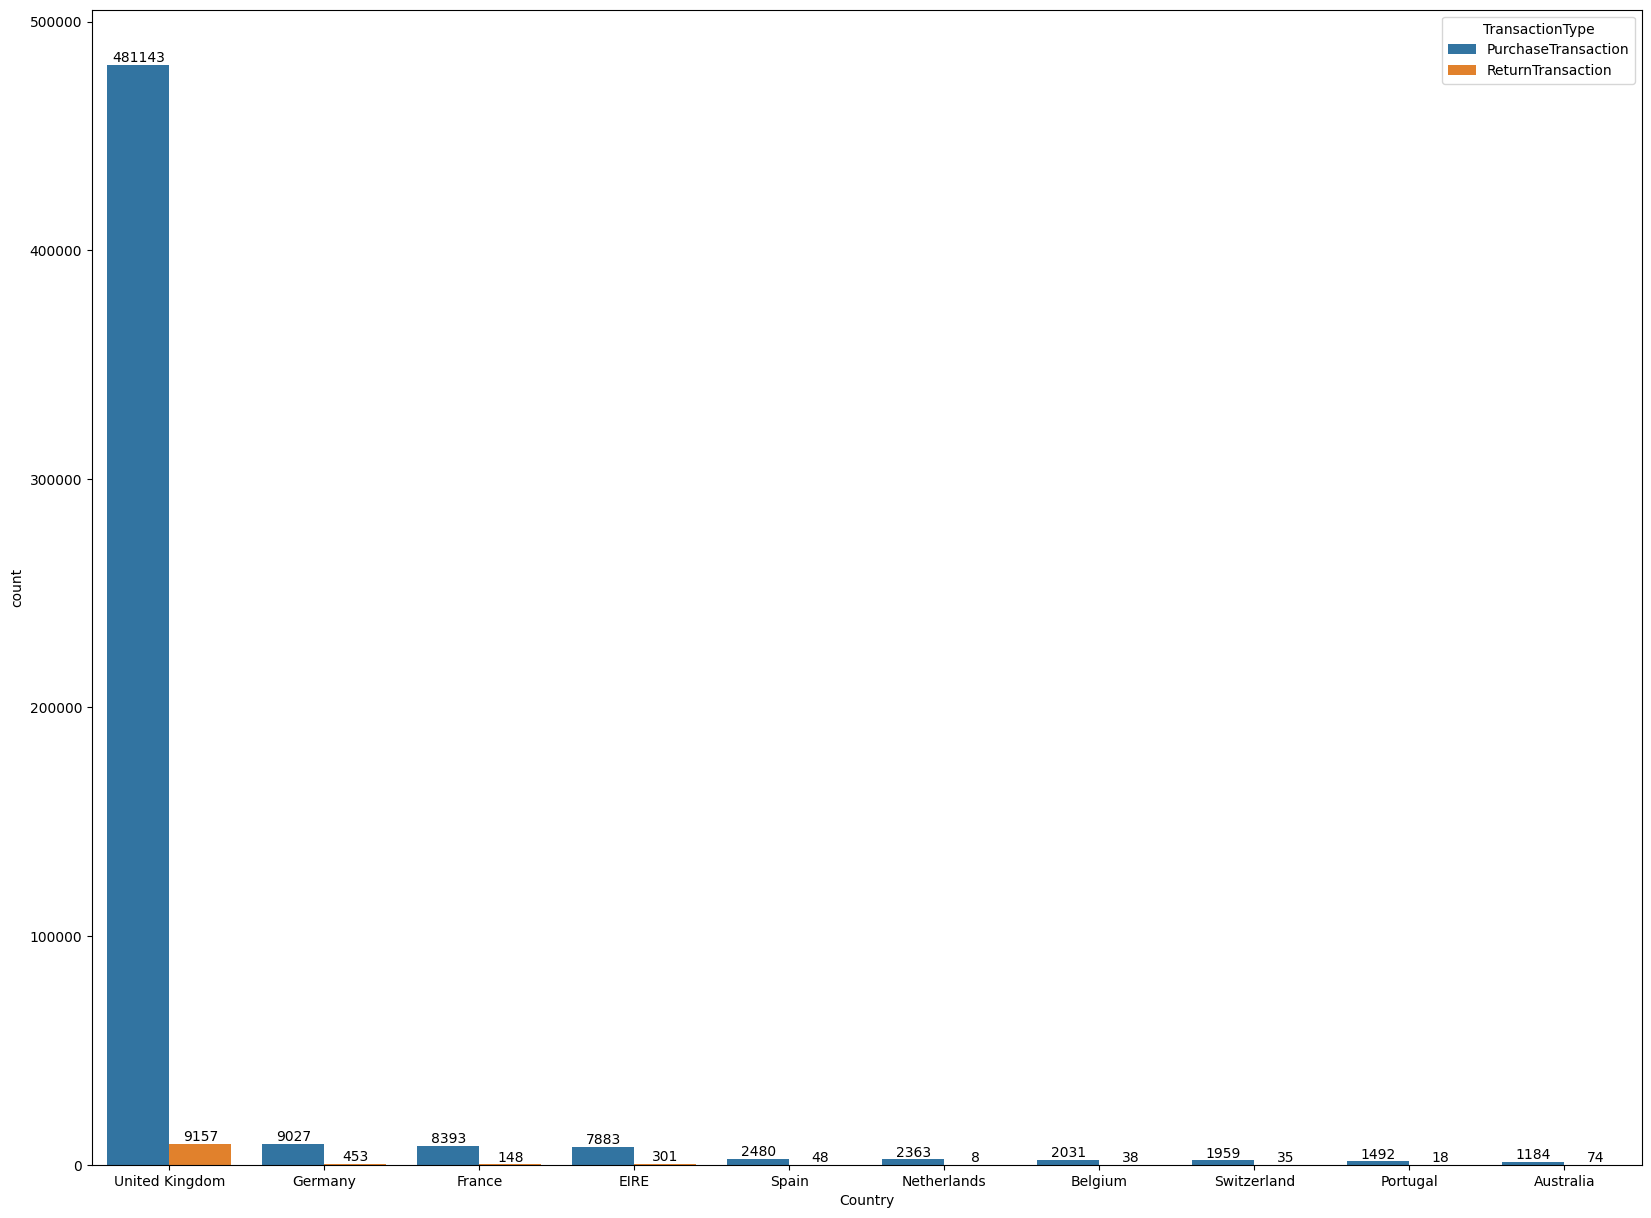

In [ ]:
#### 1. Top 10 country based on number of records

plt.figure(figsize=(20,15))

a=sns.countplot(data = data,x='Country',hue='TransactionType',order=data['Country'].value_counts().iloc[:10].index)
for k in a.containers:
     a.bar_label(k)

plt.show()

In [ ]:
#Top 10 Customers based on TotalAmount spend
top_customer = data.groupby('CustomerID')['TotalAmount'].sum().sort_values(ascending=False).head(10)
top_customer

CustomerID
0        1447487.53
14646     279489.02
18102     256438.49
17450     187322.17
14911     132458.73
12415     123725.45
14156     113214.59
17511      88125.38
16684      65892.08
13694      62690.54
Name: TotalAmount, dtype: float64

<ipython-input-41-ff42b4d28511>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),cmap='Blues',annot=True)


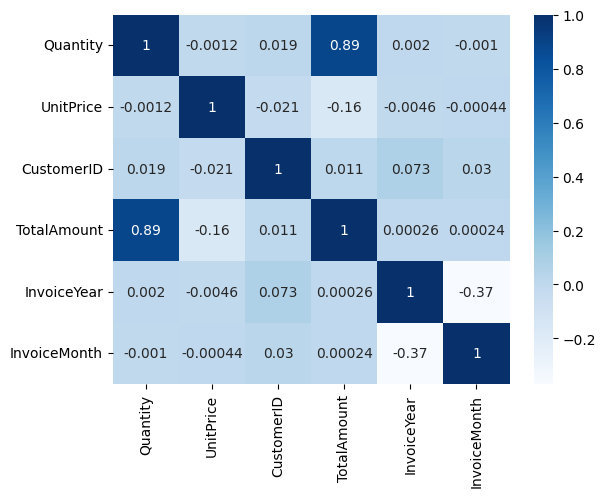

In [ ]:
##Heat Map to show relation between columns
sns.heatmap(data.corr(),cmap='Blues',annot=True)
plt.show()

**# RFM Analysis**

In [ ]:
#Recency
data["InvoiceDate"].max()

Timestamp('2011-12-09 12:50:00')

In [ ]:
# I choose last Invoicedate as my analysis date
today_date=dt.datetime(2011,12,9)


In [ ]:
# Using Groupby customerID
data.groupby("CustomerID").agg({"InvoiceDate": "max"}).head()

,InvoiceDate
CustomerID,
0,2011-12-09 10:26:00
12346,2011-01-18 10:17:00
12347,2011-12-07 15:52:00
12348,2011-09-25 13:13:00
12349,2011-11-21 09:51:00


In [ ]:
# Now substract max date values and our analysis date
Recency = today_date-data.groupby("CustomerID").agg({"InvoiceDate": "max"})

In [ ]:
Recency.head()

,InvoiceDate
CustomerID,
0,-1 days +13:34:00
12346,324 days 13:43:00
12347,1 days 08:08:00
12348,74 days 10:47:00
12349,17 days 14:09:00


In [ ]:
# clear data time
Recency["InvoiceDate"] = [i.days for i in Recency["InvoiceDate"]]


In [ ]:
#Now we see date time as day
Recency.head()

,InvoiceDate
CustomerID,
0,-1
12346,324
12347,1
12348,74
12349,17


In [ ]:
Recency.rename(columns={"InvoiceDate": "Recency"},inplace=True)

In [ ]:
#FREQUENCY

In [ ]:
data.groupby("CustomerID").agg({"InvoiceNo":"nunique"}).head(10)

,InvoiceNo
CustomerID,
0,3710
12346,2
12347,7
12348,4
12349,1
12350,1
12352,11
12353,1
12354,1


In [ ]:
freq = data.groupby("CustomerID").agg({"InvoiceNo":"nunique"})

In [ ]:
freq = freq.rename(columns={"InvoiceNo":"Frequency"})


In [ ]:
freq.head()

,Frequency
CustomerID,
0,3710
12346,2
12347,7
12348,4
12349,1


In [ ]:
#MONETARY
money = data.groupby("CustomerID").agg({"TotalAmount":"sum"}).rename(columns={"TotalAmount":"Monetary"})

In [ ]:
money.head()

,Monetary
CustomerID,
0,1447487.53
12346,0.00
12347,4310.00
12348,1797.24
12349,1757.55


In [ ]:
# check shapes
print(Recency.shape, freq.shape, money.shape)

(4373, 1) (4373, 1) (4373, 1)


In [ ]:
# concat
rfm = pd.concat([Recency,freq,money], axis=1)

In [ ]:
rfm.head()


,Recency,Frequency,Monetary
CustomerID,,,
0,-1,3710,1447487.53
12346,324,2,0.00
12347,1,7,4310.00
12348,74,4,1797.24
12349,17,1,1757.55


In [ ]:
# determine range
rfm["Recency-Score"] = pd.qcut(rfm["Recency"],5,labels=[5,4,3,2,1])
rfm["Frequency-Score"] = pd.qcut(rfm["Frequency"].rank(method="first"),5,labels=[1,2,3,4,5])
rfm["Monetary-Score"] = pd.qcut(rfm["Monetary"],5,labels=[1,2,3,4,5])

In [ ]:
rfm.head()


,Recency,Frequency,Monetary,Recency-Score,Frequency-Score,Monetary-Score
CustomerID,,,,,,
0,-1,3710,1447487.53,5,5,5
12346,324,2,0.00,1,2,1
12347,1,7,4310.00,5,4,5
12348,74,4,1797.24,2,3,4
12349,17,1,1757.55,4,1,4


In [ ]:
rfm["RFM"] = rfm["Recency-Score"].astype("str")+rfm["Monetary-Score"].astype("str")+rfm["Frequency-Score"].astype("str")

In [ ]:
rfm.head()


,Recency,Frequency,Monetary,Recency-Score,Frequency-Score,Monetary-Score,RFM
CustomerID,,,,,,,
0,-1,3710,1447487.53,5,5,5,555
12346,324,2,0.00,1,2,1,112
12347,1,7,4310.00,5,4,5,554
12348,74,4,1797.24,2,3,4,243
12349,17,1,1757.55,4,1,4,441


In [ ]:
# u can see these groups in rfm table
# this func is about recency and frequency
segmnt_map = {r'[1-2][1-2]' : "Hibernating" ,
 r'[1-2][3-4]' : "At Risk" ,
 r'[1-2]5' : "Can't Lose" ,
 r'3[1-2]' :"About to Sleep" ,
 r'33' :"Need Attention" ,
 r'[3-4][4-5]' :"Loyal Customers" ,
 r'41' :"Promising" ,
 r'51' :"New Customers" ,
 r'[4-5][2-3]' :"Potential Loyalist",
 r'5[4-5]' :"Champions"
}

In [ ]:
rfm["Segment"] = rfm["Recency-Score"].astype("str")+rfm["Frequency-Score"].astype("str")


In [ ]:
rfm["Segment"] = rfm["Segment"].replace(segmnt_map,regex=True)

In [ ]:
rfm.head()


,Recency,Frequency,Monetary,Recency-Score,Frequency-Score,Monetary-Score,RFM,Segment
CustomerID,,,,,,,,
0,-1,3710,1447487.53,5,5,5,555,Champions
12346,324,2,0.00,1,2,1,112,Hibernating
12347,1,7,4310.00,5,4,5,554,Champions
12348,74,4,1797.24,2,3,4,243,At Risk
12349,17,1,1757.55,4,1,4,441,Promising


In [ ]:
rfm[["Segment","Recency","Frequency","Monetary"]].head()

,Segment,Recency,Frequency,Monetary
CustomerID,,,,
0,Champions,-1,3710,1447487.53
12346,Hibernating,324,2,0.00
12347,Champions,1,7,4310.00
12348,At Risk,74,4,1797.24
12349,Promising,17,1,1757.55


In [ ]:
rfm[["Segment","Recency","Frequency","Monetary"]].groupby("Segment").agg(["min","max","mean"]).reset_index()

Segment Recency                  Frequency                   \
                          min  max        mean       min   max       mean   
0      About to Sleep      31   70   51.046070         1     2   1.289973   
1             At Risk      71  371  156.653400         2     7   3.313433   
2          Can't Lose      71  311  132.088235         7    35   9.823529   
3           Champions      -1   10    4.067568         4  3710  20.139640   
4         Hibernating      71  372  216.221273         1     2   1.202279   
5     Loyal Customers      11   70   31.289308         4    76   7.991195   
6      Need Attention      31   70   47.726316         2     4   2.636842   
7       New Customers      -1   10    5.238095         1     1   1.000000   
8  Potential Loyalist      -1   30   14.571429         1     4   2.216327   
9           Promising      11   30   21.103093         1     1   1.000000   

  Monetary                           
       min         max         mean  
0  -134.80     6207.67   432.478808  
1  -840.76    21535.90   947.906637  
2   230.70    10217.48  2373.597794  
3   151.23  1447487.53  8660.454520  
4 -4287.63     7829.89   374.891720  
5 -1165.30   123725.45  2697.407888  
6    -8.15     3541.94   784.815316  
7    41.99     3861.00   375.261905  
8   -17.45    12393.70   678.297347  
9     0.00     1757.55   300.261340

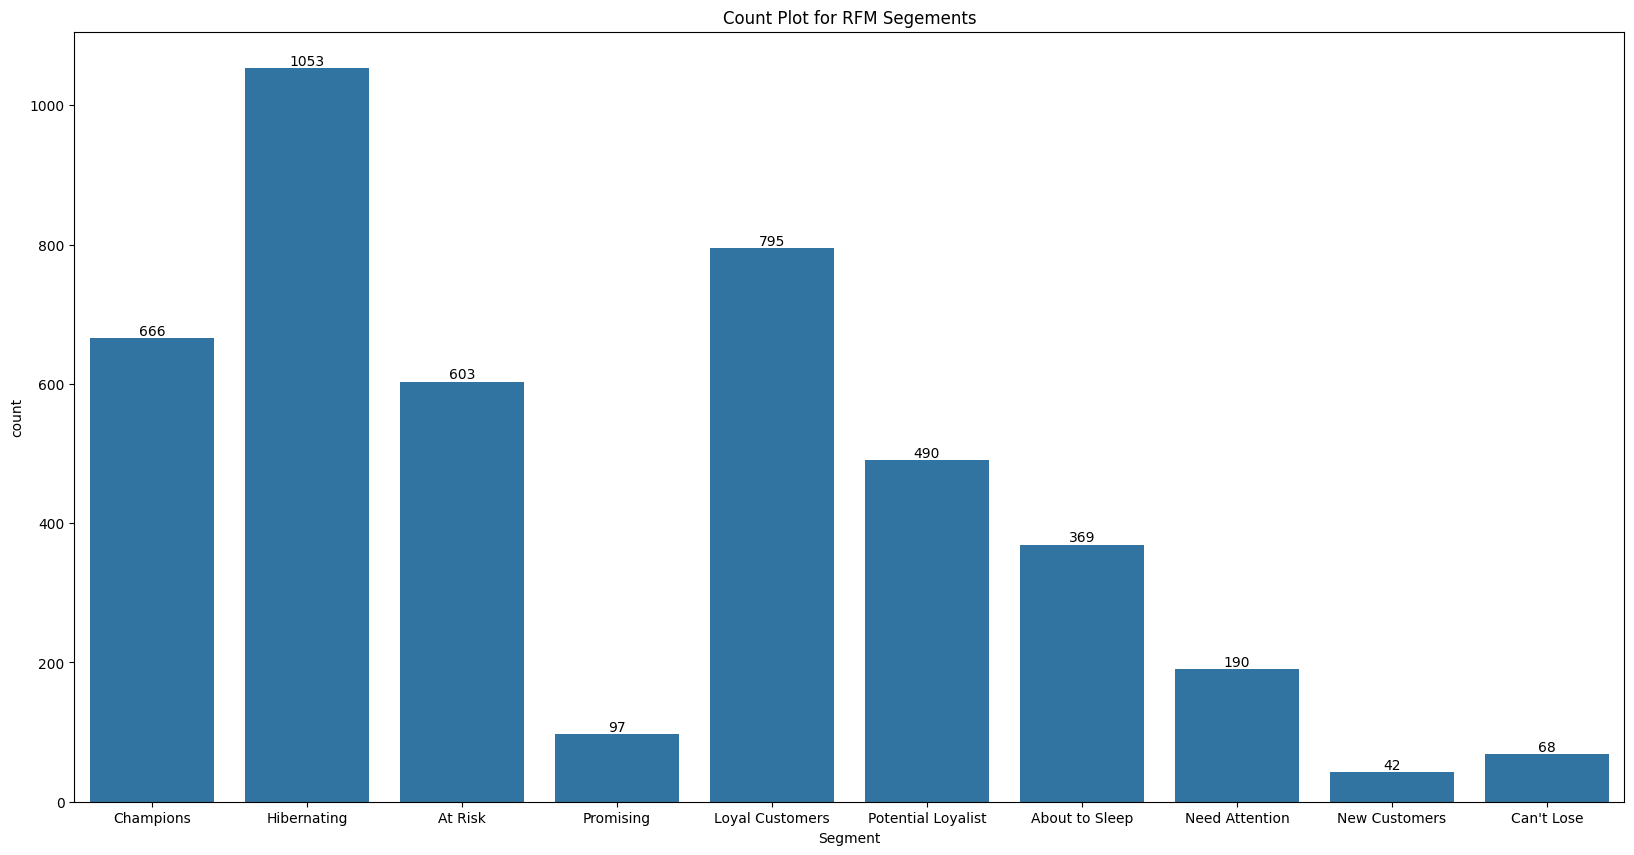

In [ ]:
plt.figure(figsize= (20,10))
plot_ = sns.countplot(data =rfm , x = 'Segment')
for k in plot_.containers:
     plot_.bar_label(k)
plt.title('Count Plot for RFM Segements')
plt.show()

**Amount Spend by customers in Each RFM Segment **

In [ ]:
segment_monetary = rfm.groupby(rfm['Segment'])['Monetary'].sum()
segment_monetary = segment_monetary.reset_index()
segment_monetary

,Segment,Monetary
0,About to Sleep,159584.680
1,At Risk,571587.702
2,Can't Lose,161404.650
3,Champions,5767862.710
4,Hibernating,394760.981
5,Loyal Customers,2144439.271
6,Need Attention,149114.910
7,New Customers,15761.000
8,Potential Loyalist,332365.700
9,Promising,29125.350


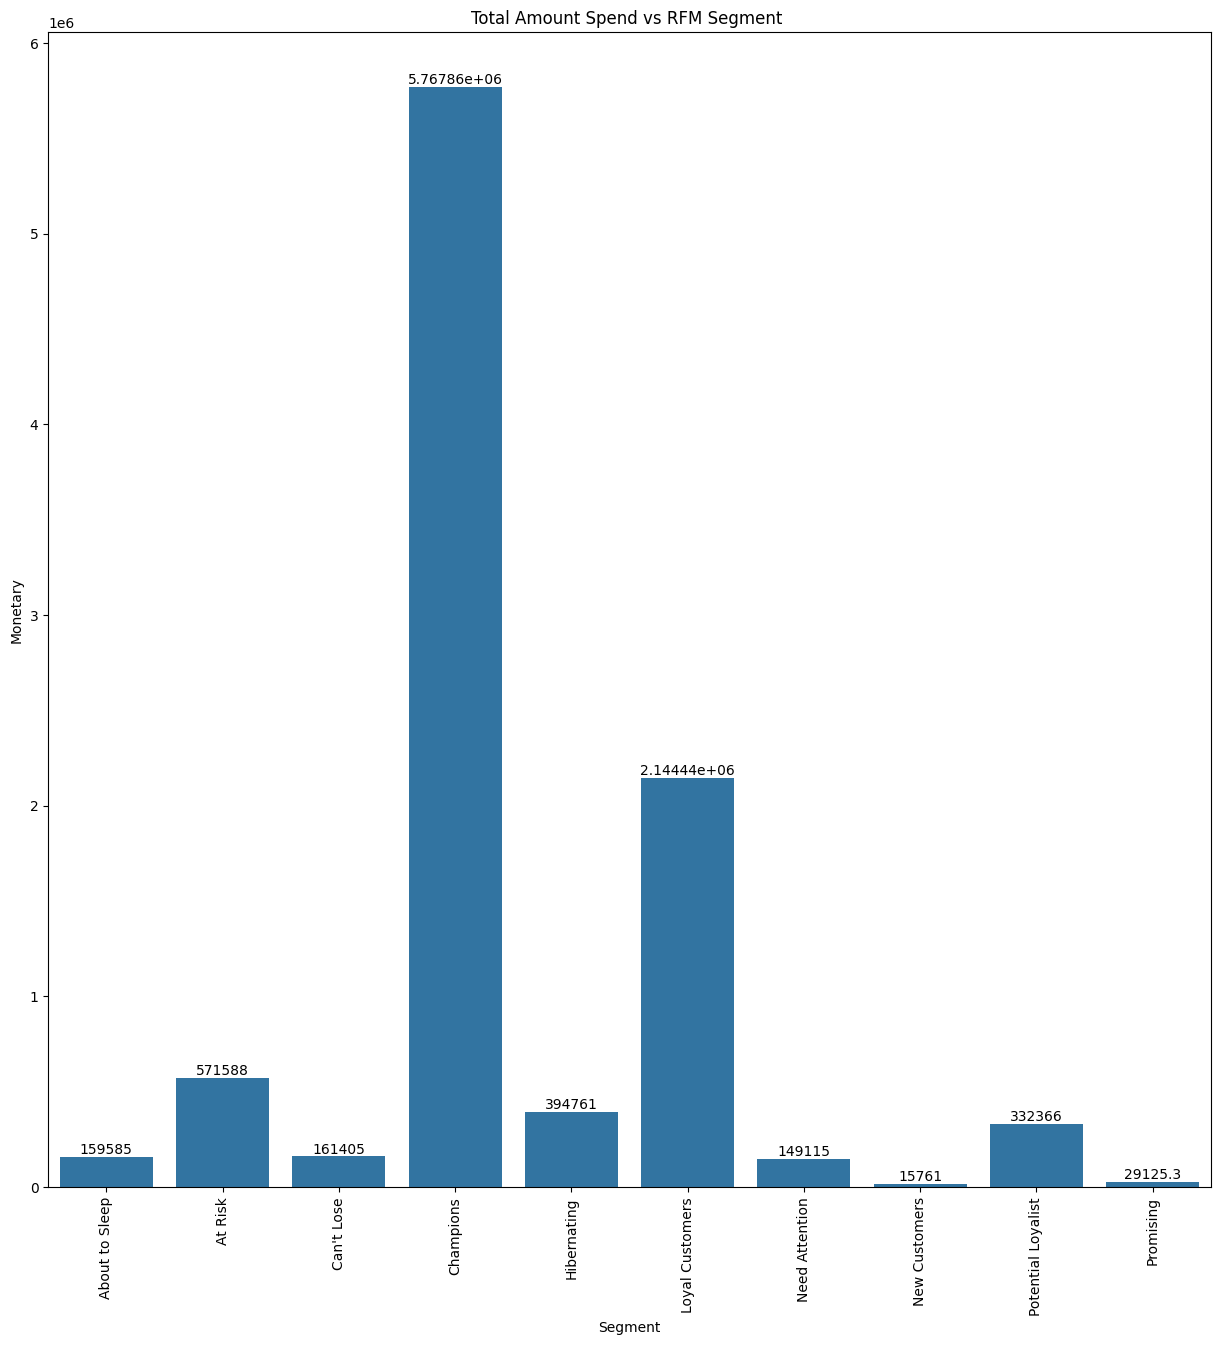

In [ ]:
plt.figure(figsize= (15,15))
plot_ = sns.barplot(data =segment_monetary , x ='Segment', y = 'Monetary')
for k in plot_.containers:
     plot_.bar_label(k)
plt.title('Total Amount Spend vs RFM Segment ')
plt.xticks(rotation=90)
plt.show()

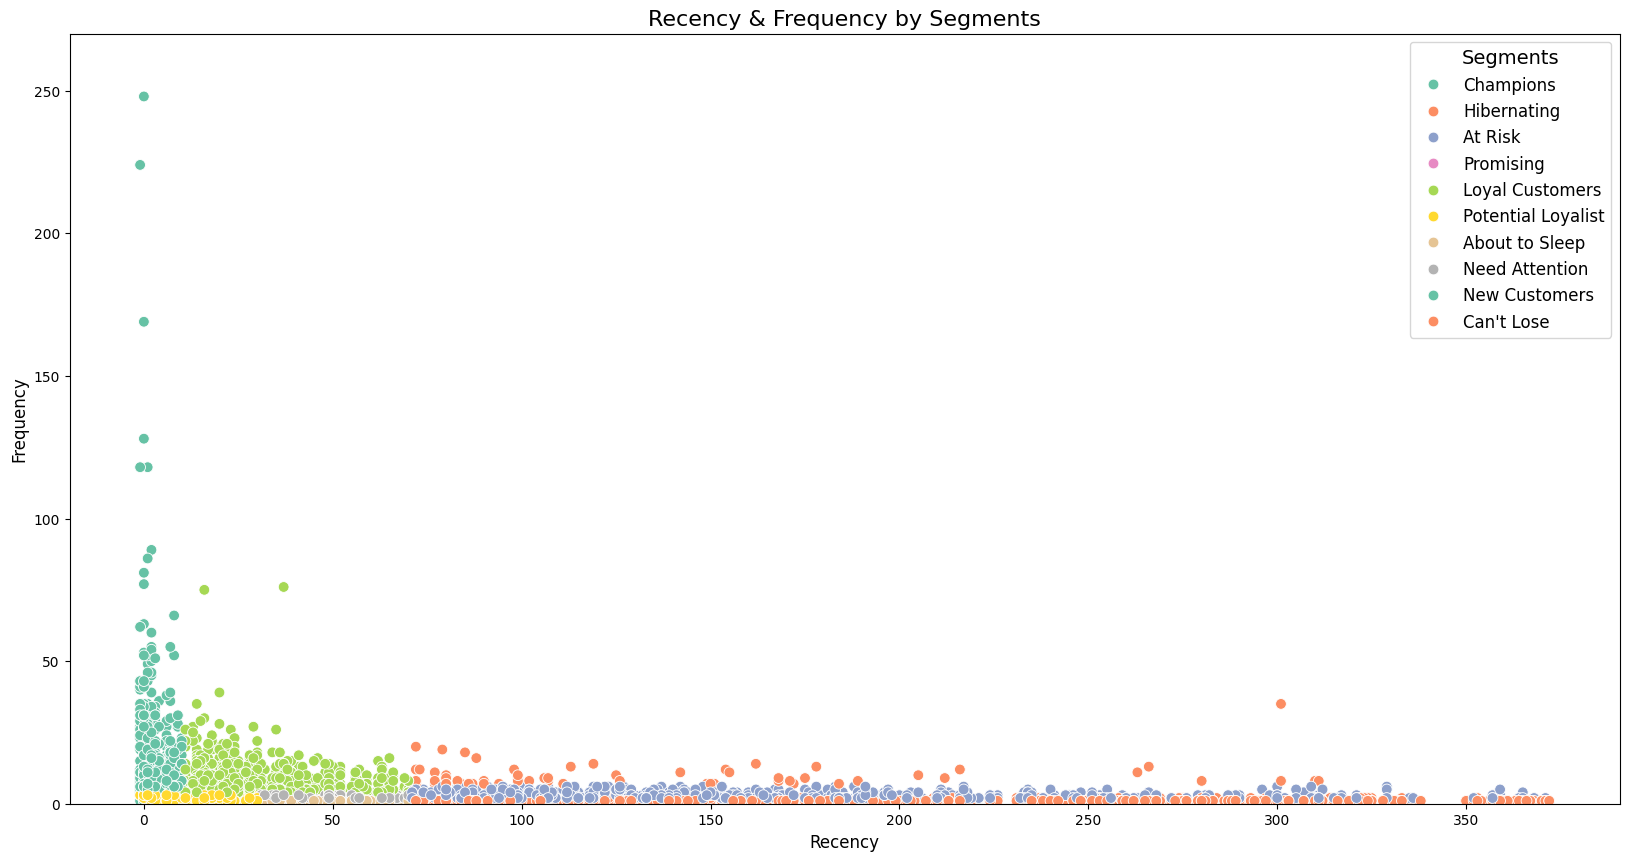

In [ ]:
plt.figure(figsize=(20, 10))
a = sns.scatterplot(
    data=rfm, x="Recency", y="Frequency", hue="Segment", s=60,palette='Set2'
)
a.set_ylim(0, 270)
plt.title("Recency & Frequency by Segments", size=16)
plt.xlabel("Recency", size=12)
plt.ylabel("Frequency", size=12)
plt.xticks(size=10)
plt.yticks(size=10)

plt.legend( fontsize=12, title="Segments", title_fontsize=14)
plt.show()


#### Observations
- Have devided customers on the bases on RFM Scores into 10 categories.

- Most of the Customers are belong to Hibernating Category
- Highest Monetary (or Customer Life Time Value ) is of customers belonging to Champions Segment followed by Loyal Customer Segment

**Customer Analysis**

In [ ]:
#Total Number of Customers
data['CustomerID'].nunique()

4373

In [ ]:
#Top 5 Customers by Revenue
data['Revenue'] = data['Quantity'] * data['UnitPrice']
top_cust = data.groupby('CustomerID')['Revenue'].sum().sort_values(ascending=False).head()
top_cust


CustomerID
0        1447487.53
14646     279489.02
18102     256438.49
17450     187322.17
14911     132458.73
Name: Revenue, dtype: float64

In [ ]:
# New vs Returning Customers
cust_orders = data.groupby('CustomerID').agg({'InvoiceNo': 'nunique'}).reset_index()
new_cust = cust_orders[cust_orders['InvoiceNo'] == 1]
print('% New customers:', (len(new_cust)/len(cust_orders)*100))
print('% Repeat customers:', 100-(len(new_cust)/len(cust_orders)*100))

% New customers: 30.025154356277156
% Repeat customers: 69.97484564372284


**Product Analysis**

In [ ]:
#Total SKUs
data['StockCode'].nunique()

4070

In [ ]:
#Total Quanity Sold
data['Quantity'].sum()

5162502

In [ ]:
#Top 5 selling products (Quanity)
top_prods = data.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(5)
print(top_prods)

Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS    53751
JUMBO BAG RED RETROSPOT              47260
POPCORN HOLDER                       36322
ASSORTED COLOUR BIRD ORNAMENT        36282
PACK OF 72 RETROSPOT CAKE CASES      36016
Name: Quantity, dtype: int64


In [ ]:
top_SKUs = data.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head(5)
print(top_SKUs)

StockCode
22197     56427
84077     53751
85099B    47260
85123A    38811
84879     36122
Name: Quantity, dtype: int64


In [ ]:
returned_products_with_quantity = data[data['Quantity'] < 0][['Description', 'Quantity']]
print("Returned Products with Quantity:")
print(returned_products_with_quantity)


Returned Products with Quantity:
                             Description  Quantity
141                             Discount        -1
154      SET OF 3 COLOURED  FLYING DUCKS        -1
235       PLASTERS IN TIN CIRCUS PARADE        -12
236     PACK OF 12 PINK PAISLEY TISSUES        -24
237     PACK OF 12 BLUE PAISLEY TISSUES        -24
...                                  ...       ...
535188   ZINC T-LIGHT HOLDER STARS SMALL       -11
536280                            Manual        -1
536447        VICTORIAN SEWING BOX LARGE        -5
536448  HANGING HEART JAR T-LIGHT HOLDER        -1
536449     36 PENCILS TUBE RED RETROSPOT        -5

[10587 rows x 2 columns]


In [ ]:
returned_products = data[data['Quantity'] < 0]
top_returned_items = returned_products.groupby('Description')['Quantity'].sum().sort_values().head(5)
print("Top 5 Most Returned Items:")
print(top_returned_items)


Top 5 Most Returned Items:
Description
PAPER CRAFT , LITTLE BIRDIE      -80995
MEDIUM CERAMIC TOP STORAGE JAR   -74494
NA                               -46156
printing smudges/thrown away     -19200
Unsaleable, destroyed.           -15644
Name: Quantity, dtype: int64


**Sales Analysis**

In [ ]:
# Monthly Revenue Trend
month_rev = data.groupby(data['InvoiceDate'].dt.month)['Revenue'].sum().sort_index()

print(month_rev)

InvoiceDate
1      558448.560
2      497026.410
3      682013.980
4      492367.841
5      722094.100
6      689977.230
7      680156.991
8      681386.460
9     1017596.682
10    1069368.230
11    1456145.800
12    1179424.670
Name: Revenue, dtype: float64


In [ ]:
# Calculating % of each month sales contribution
(month_rev / month_rev.sum()) * 100

InvoiceDate
1      5.741807
2      5.110282
3      7.012271
4      5.062384
5      7.424363
6      7.094147
7      6.993178
8      7.005819
9     10.462636
10    10.994936
11    14.971671
12    12.126504
Name: Revenue, dtype: float64

In [ ]:
# Calculate Average Order Value (AOV)
average_order_value = data.groupby('InvoiceNo')['Revenue'].sum().mean()
print("Average Order Value (AOV):", average_order_value, "\n")

Average Order Value (AOV): 375.521504015444 



In [ ]:
# Calculate Average Revenue Per User (ARPU)
average_Revenue_Per_User = data.groupby('CustomerID')['Revenue'].sum().mean()
print("ARPU:", average_Revenue_Per_User, "\n")

ARPU: 2224.1040370455066 



In [ ]:
# Calculate Customer Purchase Frequency
invoice_frequency = data.groupby('CustomerID')['InvoiceNo'].nunique()
invoice_frequency

CustomerID
0        3710
12346       2
12347       7
12348       4
12349       1
         ... 
18280       1
18281       1
18282       3
18283      16
18287       3
Name: InvoiceNo, Length: 4373, dtype: int64

### 5.2 Country wise Analysis of Total Amount Spend

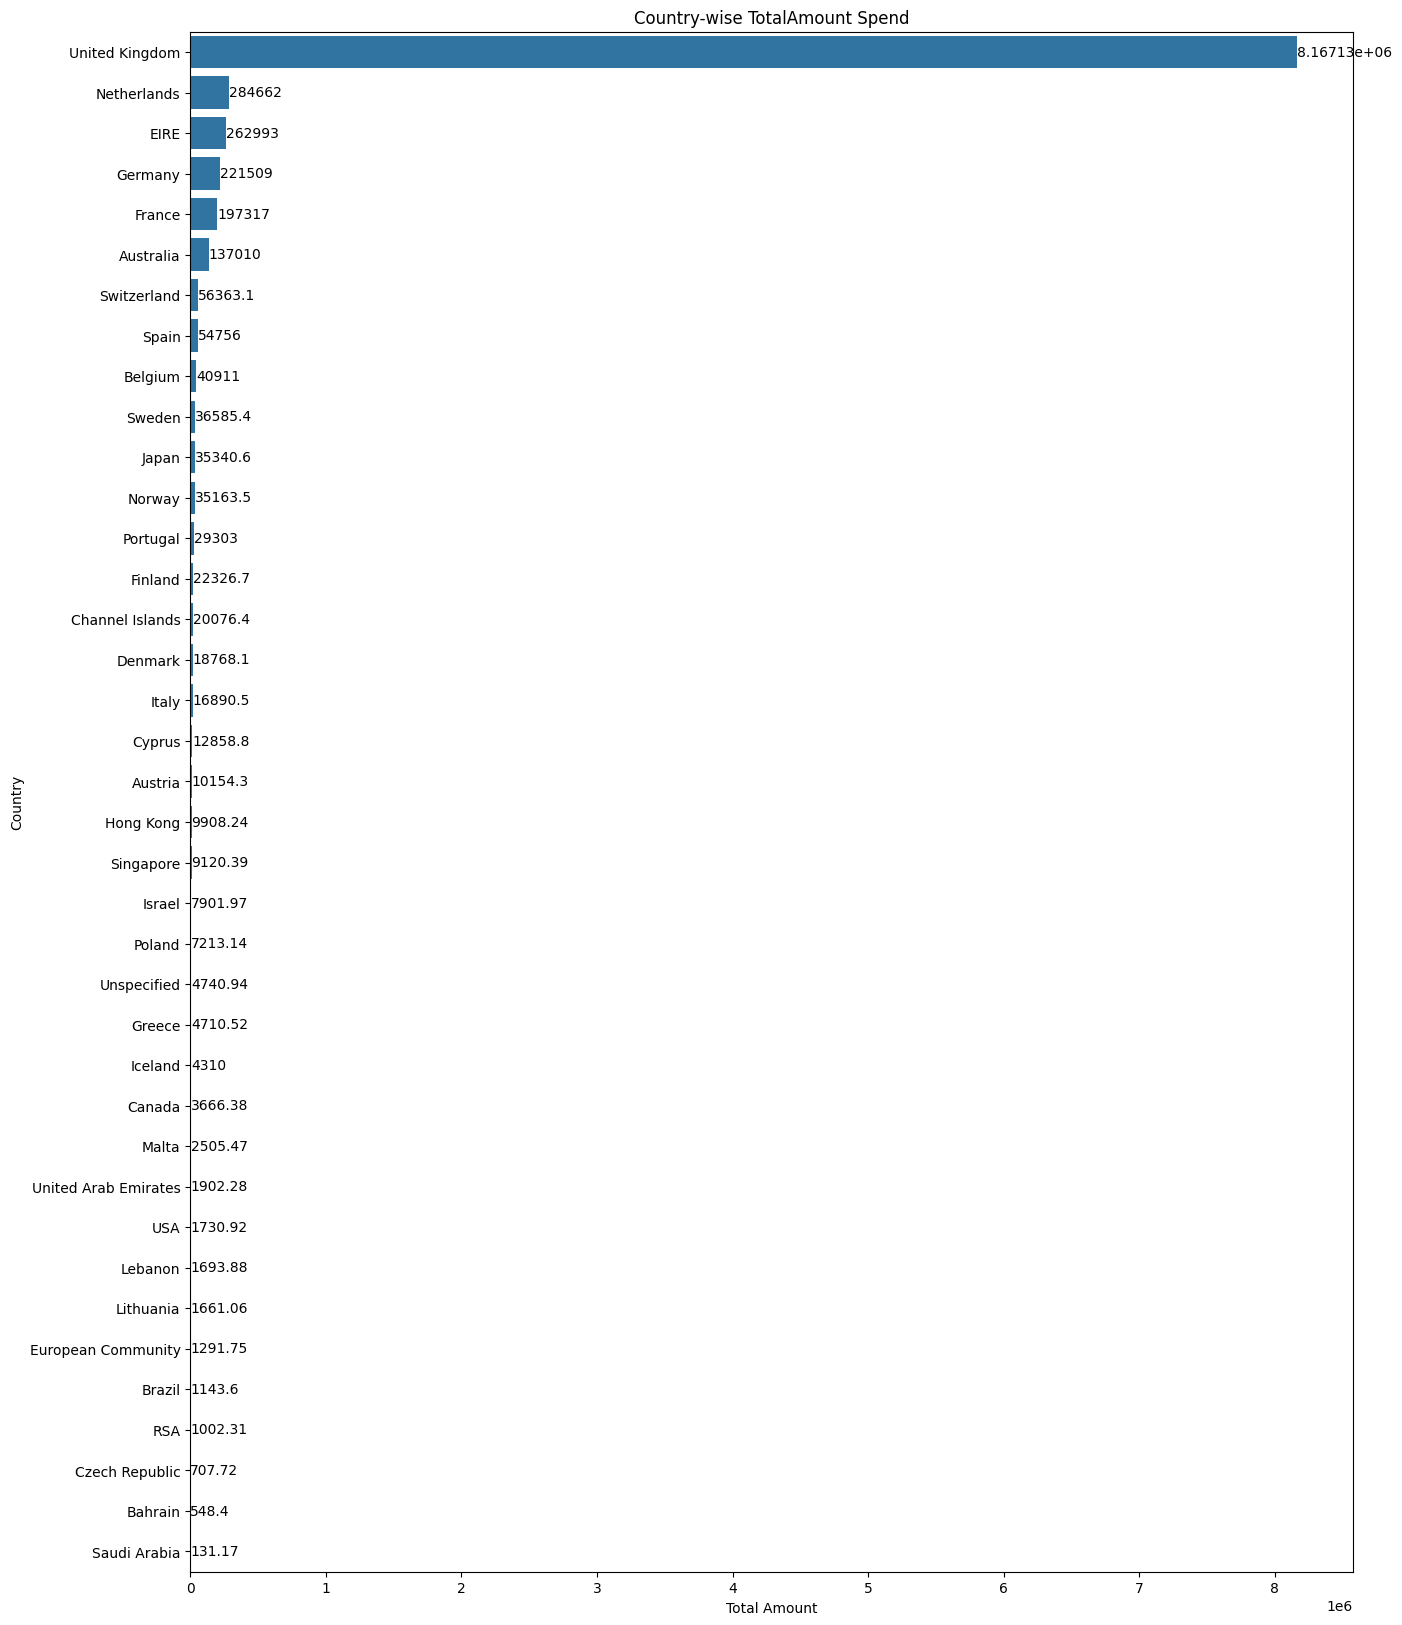

In [ ]:
country_amount= data.groupby('Country')['TotalAmount'].sum().sort_values(ascending=False)

plt.figure(figsize=(15, 20))
a = sns.barplot(x=country_amount.values, y=country_amount.index)
for k in a.containers:
     a.bar_label(k)

plt.title('Country-wise TotalAmount Spend')
plt.xlabel('Total Amount')
plt.ylabel('Country')
plt.show()

**Count of Customer vs Invoice Time**


In [ ]:
data["InvoiceDate"].dt.hour.value_counts()

12    77573
15    76938
13    71247
14    66572
11    56949
16    54134
10    48808
9     34314
17    28371
8      8906
18     7941
19     3617
20      847
7       383
6        41
Name: InvoiceDate, dtype: int64

In [ ]:
bins_ = [6,12,17,20,24]
labels_ =['Morning','Afternoon','Evening','Night']
data["Invoice_TimeBin"] = pd.cut(data["InvoiceDate"].dt.hour,
                                       bins=bins_,
                                       labels=labels_ , right =False)

In [ ]:
plot_ = data.groupby(['Invoice_TimeBin','TransactionType']).agg({'CustomerID':pd.Series.nunique}).reset_index()
plot_.rename(columns={'CustomerID': 'Cnt_Unique_CustomerID'}, inplace=True)
plot_

,Invoice_TimeBin,TransactionType,Cnt_Unique_CustomerID
0,Morning,PurchaseTransaction,2520
1,Morning,ReturnTransaction,764
2,Afternoon,PurchaseTransaction,3566
3,Afternoon,ReturnTransaction,1114
4,Evening,PurchaseTransaction,590
5,Evening,ReturnTransaction,355
6,Night,PurchaseTransaction,15
7,Night,ReturnTransaction,10


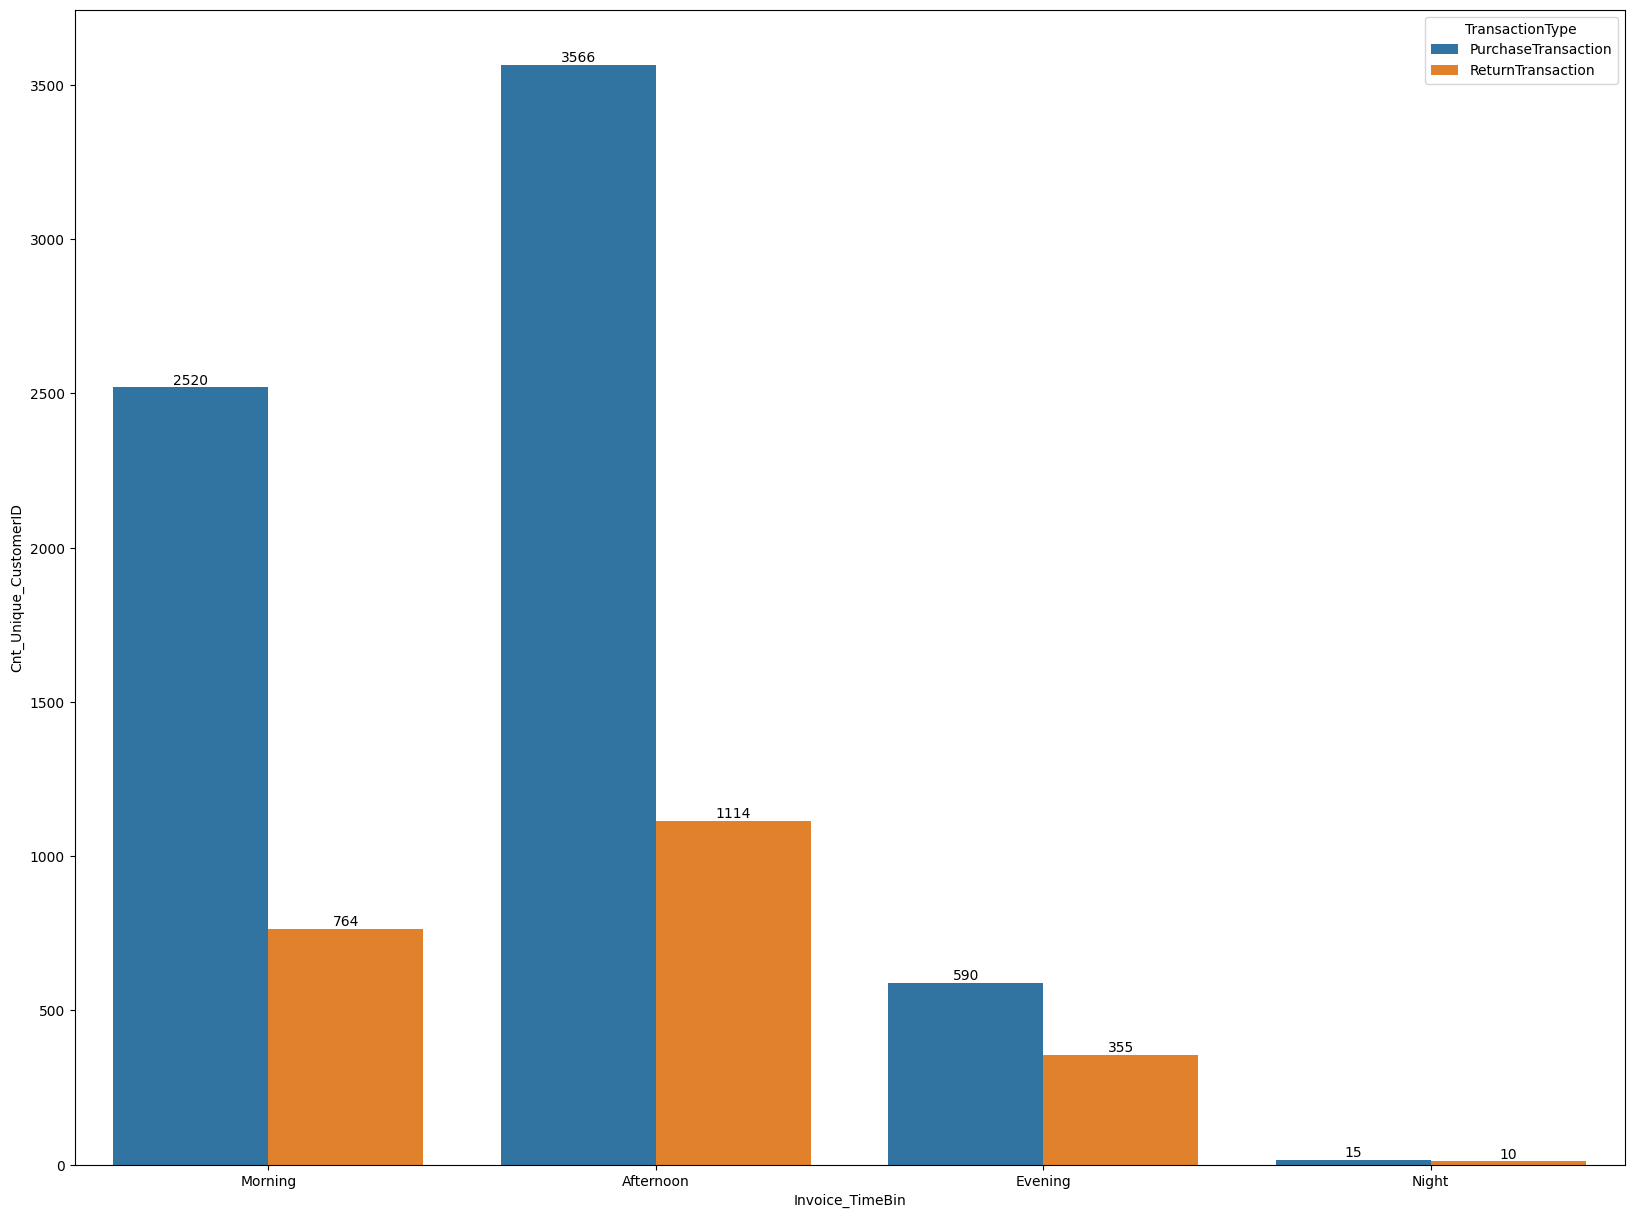

In [ ]:
plt.figure(figsize=(20,15))

a=sns.barplot(data = plot_ ,x='Invoice_TimeBin',y='Cnt_Unique_CustomerID' ,hue = 'TransactionType')
for k in a.containers:
     a.bar_label(k)

plt.show()

#### Observation :
- Top  selling product (Based on Quantity) is WORLD WAR 2 GLIDERS ASSTD DESIGNS
- Least Sold Product printing smudges/thrown away  ( Has -vs quantity indicating it is most returned product)
- Highets spend customer is 14646
- Average Order Value (AOV): 375.52
- ARPU: 2224.1040370455066
- Top 4 Months having highest revenue are November (11) , December (12), October(10), September(9)
- November contributes to 14.97 % of total sales , December contributes to 12.12% of total sales, October contributes to 10.99 % of total sales , September contributes to 10.46% of toral sales

Top 10 country based on number of unique Customer Id

In [ ]:
plot_ = data.groupby(['Country','TransactionType']).agg({'CustomerID':pd.Series.nunique}).reset_index()
plot_.rename(columns={'CustomerID': 'Cnt_Unique_CustomerID'}, inplace=True)
plot_

,Country,TransactionType,Cnt_Unique_CustomerID
0,Australia,PurchaseTransaction,9
1,Australia,ReturnTransaction,4
2,Austria,PurchaseTransaction,11
3,Austria,ReturnTransaction,2
4,Bahrain,PurchaseTransaction,3
...,...,...,...
63,USA,ReturnTransaction,2
64,United Arab Emirates,PurchaseTransaction,2
65,United Kingdom,PurchaseTransaction,3922
66,United Kingdom,ReturnTransaction,1412


In [ ]:
top_10_country = plot_.sort_values('Cnt_Unique_CustomerID', ascending = False)['Country'].unique()[:10]

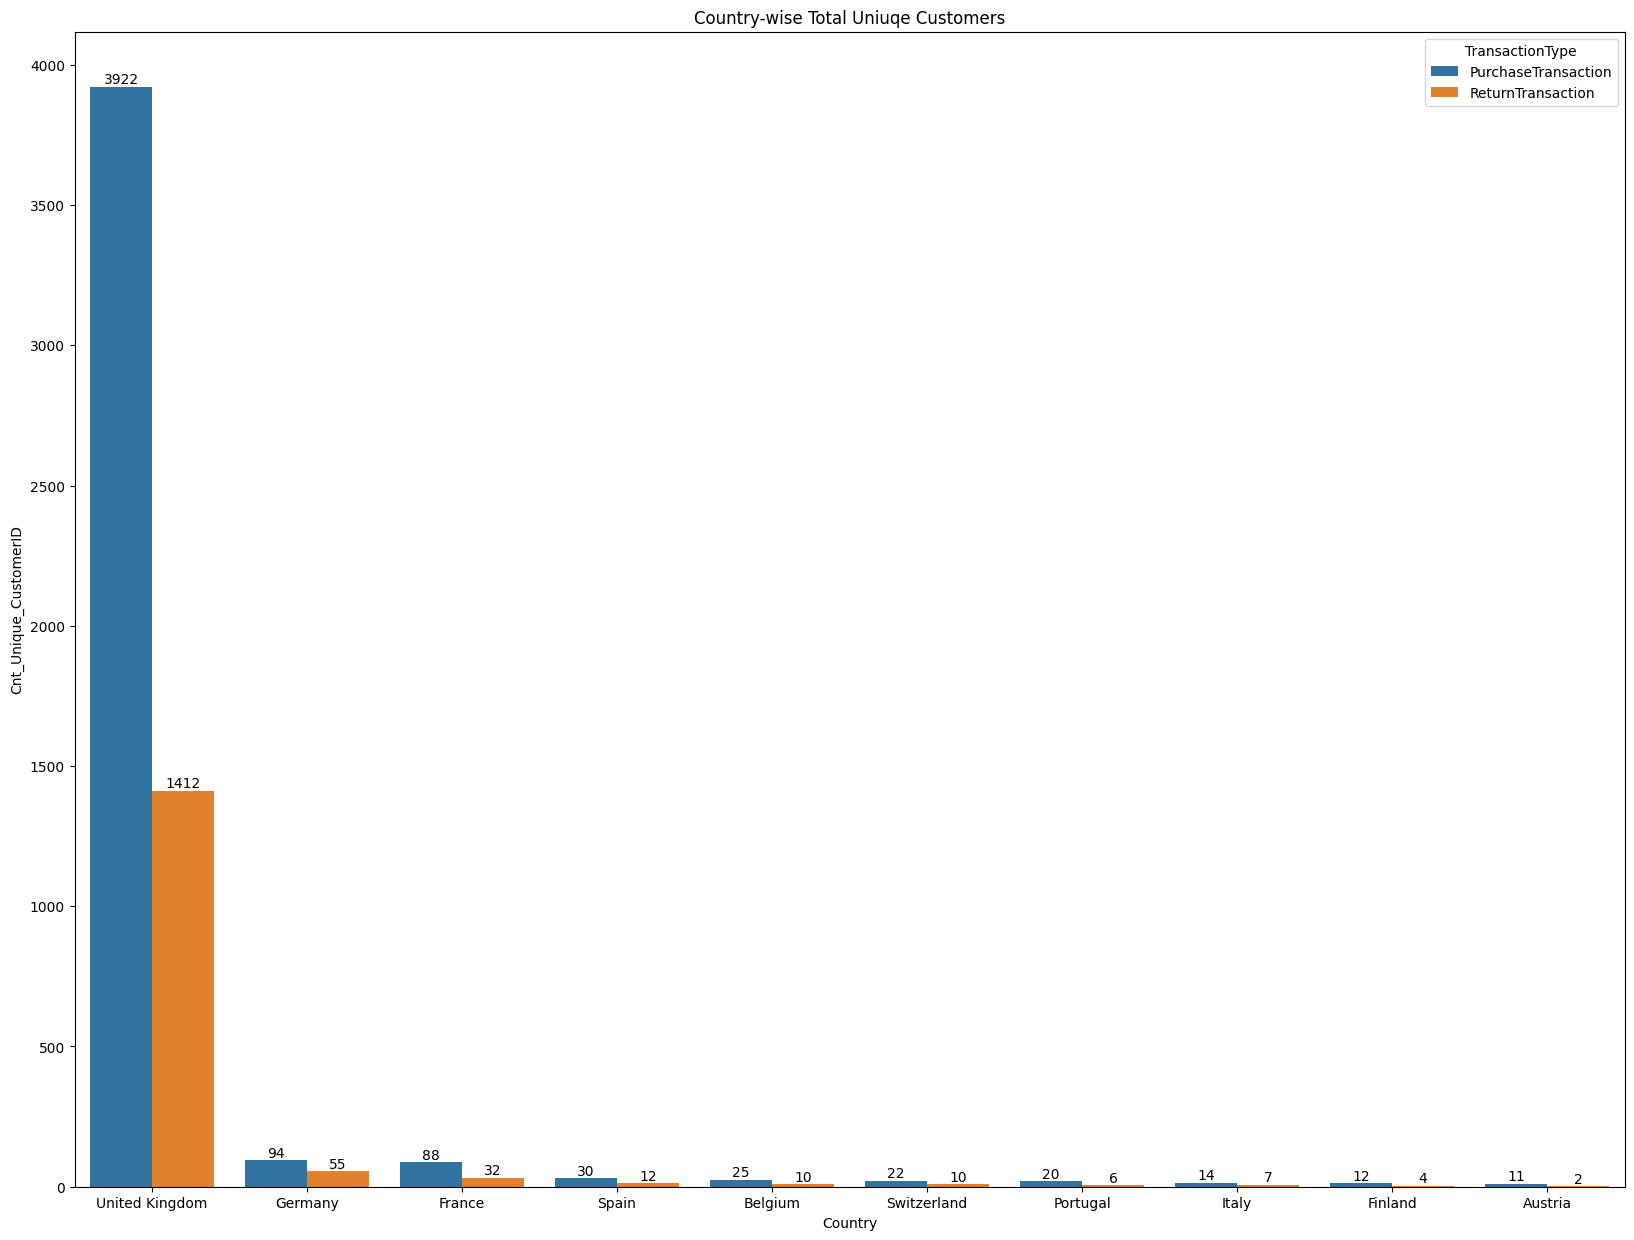

In [ ]:
plt.figure(figsize=(20,15))

a=sns.barplot(data = plot_,x='Country',y='Cnt_Unique_CustomerID',hue='TransactionType',order=top_10_country)
for k in a.containers:
     a.bar_label(k)
plt.title('Country-wise Total Uniuqe Customers')
plt.show()

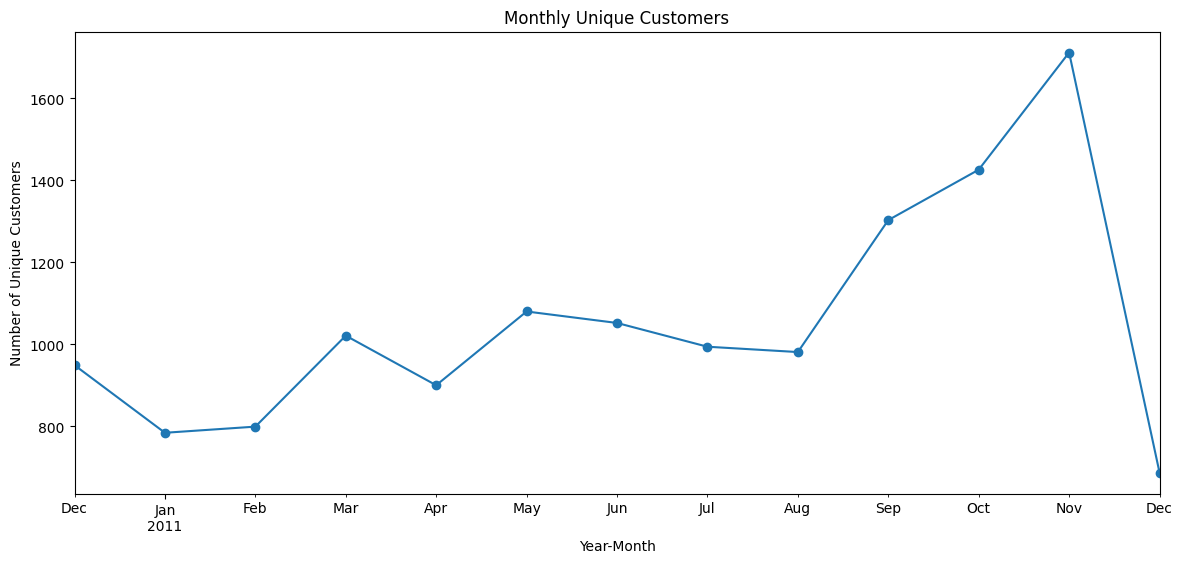

In [ ]:
# Monthly Unique Customers
monthly_unique_customers = data.groupby(data['InvoiceDate'].dt.to_period("M"))['CustomerID'].nunique()

plt.figure(figsize=(14, 6))
monthly_unique_customers.plot(kind='line', marker='o')
plt.title('Monthly Unique Customers')
plt.xlabel('Year-Month')
plt.ylabel('Number of Unique Customers')
plt.show()

<ipython-input-104-0f3501b45d23>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  weekly_sales_trend = data.groupby(data['InvoiceDate'].dt.week)['Quantity'].sum()


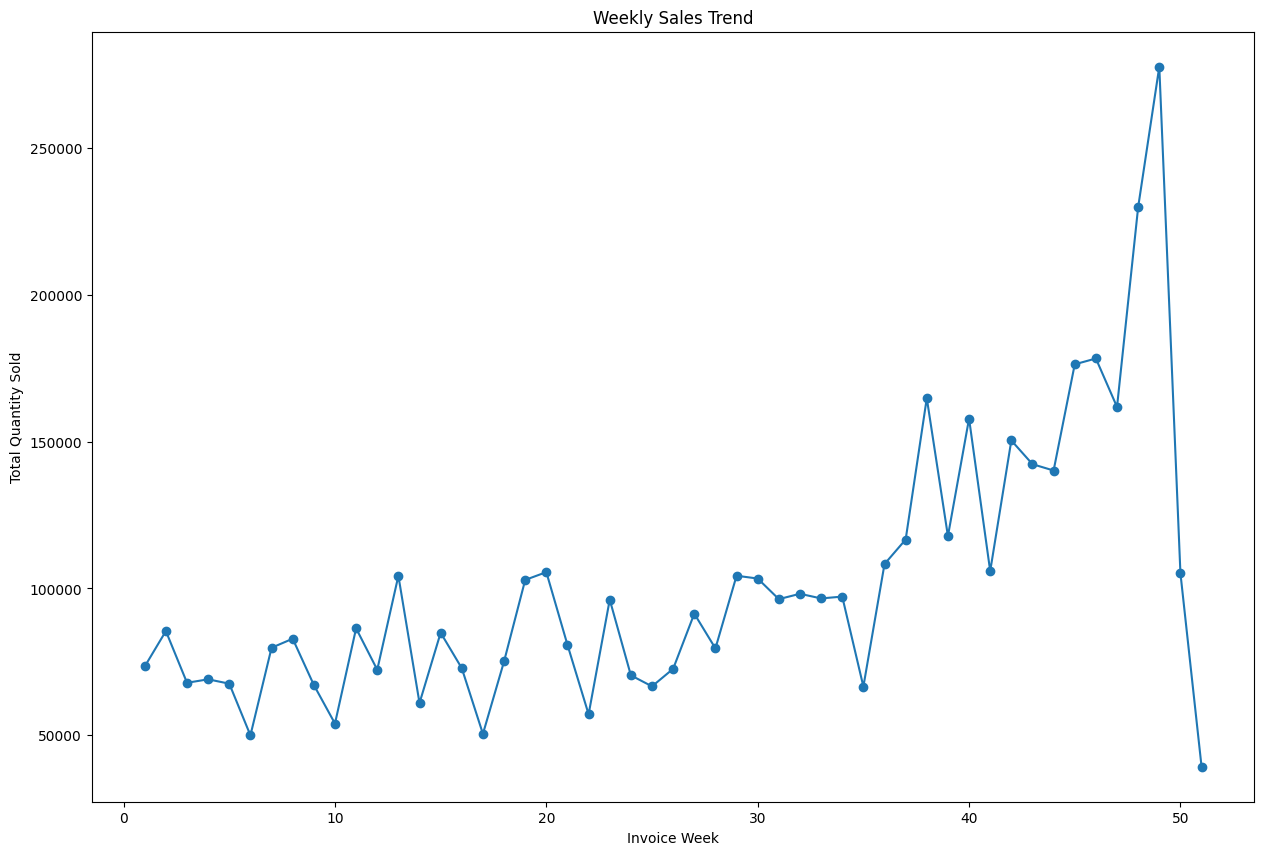

In [ ]:
 #Weekly Sales Trend
weekly_sales_trend = data.groupby(data['InvoiceDate'].dt.week)['Quantity'].sum()

plt.figure(figsize=(15, 10))
weekly_sales_trend.plot(kind='line', marker='o')
plt.title('Weekly Sales Trend')
plt.xlabel('Invoice Week')
plt.ylabel('Total Quantity Sold')
plt.show()

#### Observation :


*   Predominantly UK customers, with highest spending in the UK.
*   Most transactions, including purchases and returns, happen in the afternoon.
*   Monthly unique customer count increases consistently from January to December.

*   Minor dips in customer count observed in April and December.
Positive trend in monthly sales, with total spending increasing quarterly.



## **8. Observation and Recommendations:**

#### Basic EDA Observations on Dataset
- There are around 5268 duplicate records . Have droped the duplicate records from data.
- Column : Description and CustomerID are having Null values
- Percentage of null values in CustomerID is 25.16 %  (approx).Replaced all Null values with 0
- Percentage of null values in Description is 0.27 % (approx).Replaced all Null values with 'NA'
- Most of the customers are from United Kingdom country .
- There are 4373 unique customers in dataset.

- Note : Invoice number that consists 6 digits. If this code starts with letter 'c', it indicates a cancellation.Creating a new column to identify if it is cancellation (Cancellation) or adjustoment of bad debt (AdjustBadDebt) or a normal invoice (Normal).

- Note : Bad debt refers to loans or outstanding balances owed that are no longer deemed recoverable and must be written off.


- There are 10587 Return Transaction records which amount to 1.97 % of data.
- There are 9251 cancellation invoices . For all cancellation invoice the quantity is negative so it is a return transaction. So above return transaction count includes the cancellation invoices also.
- There are 3 invoices to Adjust Bad Debt.

#### Outlier Observations

- There are 58501 number of outler records in Column Quanity
- There are 39450 number of outlier records in column UnitPrice
- There are 45626 number of outlier records in column TotalAmount

- Not removing outlier because the company's clientele includes a significant number of wholesale customers . Due to which the there can be increase in Quantity and TotalAmount as compared to normal customer orders . Also Outlier in UnitPrice (in values greater than upper wisker) signify there are some products which are very expensive (high value goods) being bought by customers.

#### Non Grpahical Analysis
- Top  selling product is WORLD WAR 2 GLIDERS ASSTD DESIGNS
- Least Sold Product printing smudges/thrown away  ( Has -vs quantity indicating it is most returned product)
- Highets spend customer is 14646
- Average Order Value (AOV): 375.52
- Top 4 Months having highest revenue are November (11) , December (12), October(10), September(9)
- November contributes to 14.97 % of total sales , December contributes to 12.12% of total sales, October contributes to 10.99 % of total sales , September contributes to 10.46% of toral sales


#### Univariate and Bi-Variate Analysis

*   Predominantly UK customers, with highest spending in the UK.
*   Most transactions, including purchases and returns, happen in the afternoon.
*   Monthly unique customer count increases consistently from January to December.

*   Minor dips in customer count observed in April and December.
Positive trend in monthly sales, with total spending increasing quarterly.

#### RFM Segmenation Analysis
- Divided customers on the bases on RFM_Score into 10 categories
- Highest Monetary (or Customer Life Time Value ) is of customers beonging to Champions Segment followed by Loyal Customer Segment
- Very low count of 'Cant Loose' customer count means it is very good as most of the Highe Frequency / High Monetary (high spend) users are having highere recency .

#### **Recommendations**


*   Implement targeted campaigns during low-order seasons and utilize personalized promotions for events and festivals.


*   Design personalized loyalty programs with distinct privileges and discounts for high-value users, while maintaining a focus on the lucrative average consumer segment.

*   Allocate marketing budget strategically by prioritizing high-traffic markets like the UK and select European countries. Consider expanding market presence in Australia and China to tap into latent demand.

*   For loyal customers, incentivize referrals by offering cashback when new customers join using a loyal customer referral code.

*   Run special campaigns tailored for different RFM segments - hibernating, at risk, can't lose them, need attention, about to sleep - to convert them into potential loyalists and loyal customers.







#####  **Marketing Strategies for RFM Segments**
*   Champions: Reward and recognize these users, as they are influential promoters.

*   Loyal Customers: Encourage higher-value purchases and solicit product reviews.

*   Potential Loyalists: Engage with long-term offers and suggest diverse product categories.

*   Recent Users/New Customers: Ensure a smooth onboarding experience and offer assistance as needed.

*   Promising: Create brand awareness and provide free trials to foster loyalty.

*   Needs Attention: Bring back these customers with limited-period offers and personalized recommendations.

*   About To Sleep: Reactivate by recommending popular products and offering discounts for memberships.

*   Price Sensitive: Recommend highest-rated products and send targeted discount communications.

*   Can't Lose Them: Listen to feedback, suggest new products, and ensure customer retention.

*   Hibernating: Recommend products from other categories and provide personalized offers to increase visibility through various campaigns.





# **Thank you!**